<a href="https://colab.research.google.com/github/Heity94/TWSM_Lab/blob/main/Homework/7_Class_Homework/PH_HW_CNNs_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework `cats & dogs dataset`


## Training a convnet from scratch on a small dataset

### Downloading the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Copying images to training, validation, and test directories**

In [3]:
import os, shutil, pathlib
import matplotlib.pyplot as plt

base_dir = pathlib.Path("/content/drive/MyDrive/Colab_Notebooks/02_HWR/00_data/cats_and_dogs_small")

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(300, 299),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(300, 299),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(300, 299),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


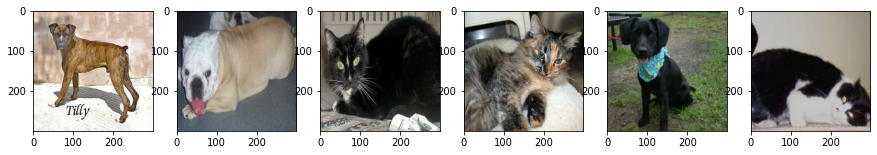

In [80]:
# Let's plot few images to see what they look like
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i, element in enumerate(train_dataset.as_numpy_iterator()):
    if i >= 6:
      break
    plt.subplot(1,6, i+1)
    img = element[0][0,:,:,:].astype("int")
    plt.imshow(img)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [83]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(300, 299, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [84]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 299, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 300, 299, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [85]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Fitting the model using a `Dataset`**

In [86]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
33/63 [==============>...............] - ETA: 4:53 - loss: 0.8859 - accuracy: 0.4915

KeyboardInterrupt: ignored

☝ Training was working, but took too long, therefore I stopped it manually

**Displaying curves of loss and accuracy during training**

In [87]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

NameError: ignored

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [91]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

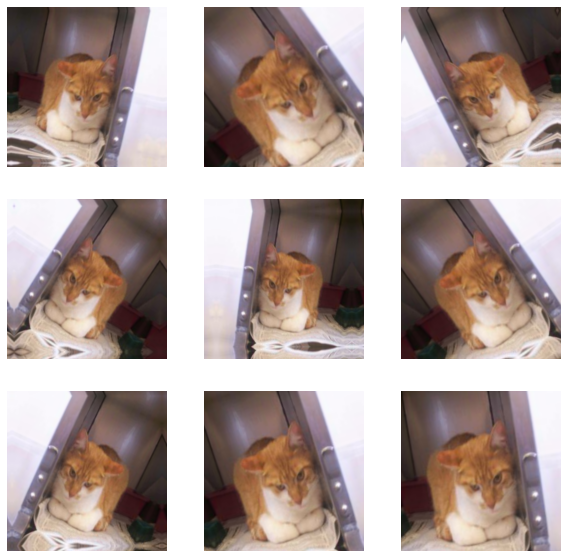

In [92]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [88]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(300, 299, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [89]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 299, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 299, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 299, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 149, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 149, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 149, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 74, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [90]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [93]:
train_features.shape

(2000, 9, 9, 512)

**Defining and training the densely connected classifier**

In [95]:
inputs = keras.Input(shape=(9, 9, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 17ms/step - loss: 24.6853 - accuracy: 0.9295 - val_loss: 10.9665 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 3.3864 - accuracy: 0.9815 - val_loss: 8.1280 - val_accuracy: 0.9750
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 4.9324 - accuracy: 0.9860 - val_loss: 6.8358 - val_accuracy: 0.9830
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 0.5950 - accuracy: 0.9970 - val_loss: 9.8855 - val_accuracy: 0.9690
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0315 - accuracy: 0.9950 - val_loss: 9.6565 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3442 - accuracy: 0.9935 - val_loss: 9.4878 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.4452 - accuracy: 0.9955 - val_loss: 9.8356 - val_accuracy: 0.9720
Epoch 8/20


**Plotting the results**

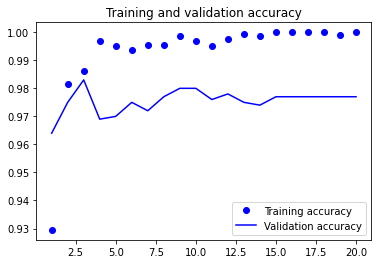

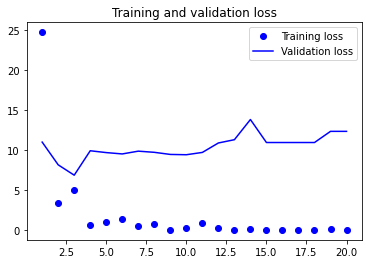

In [96]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [97]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [98]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [99]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [100]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(300, 299, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [101]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 32s 472ms/step - loss: 34.9286 - accuracy: 0.9130 - val_loss: 5.1070 - val_accuracy: 0.9730
Epoch 2/50
63/63 [==============================] - 30s 464ms/step - loss: 7.9289 - accuracy: 0.9600 - val_loss: 7.6697 - val_accuracy: 0.9720
Epoch 3/50
63/63 [==============================] - 30s 462ms/step - loss: 8.6272 - accuracy: 0.9605 - val_loss: 7.5082 - val_accuracy: 0.9650
Epoch 4/50
63/63 [==============================] - 30s 469ms/step - loss: 5.8176 - accuracy: 0.9695 - val_loss: 4.5622 - val_accuracy: 0.9740
Epoch 5/50
63/63 [==============================] - 30s 464ms/step - loss: 5.6400 - accuracy: 0.9790 - val_loss: 6.7406 - val_accuracy: 0.9740
Epoch 6/50
63/63 [==============================] - 30s 467ms/step - loss: 2.8695 - accuracy: 0.9840 - val_loss: 4.0267 - val_accuracy: 0.9850
Epoch 7/50
63/63 [==============================] - 30s 462ms/step - loss: 3.5580 - accuracy: 0.9845 - val_loss: 4.8661 - val_accuracy: 0.979

**Evaluating the model on the test set**

In [102]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 10s 287ms/step - loss: 8.7780 - accuracy: 0.9830
Test accuracy: 0.983


### Fine-tuning a pretrained model

In [103]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [104]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 33s 497ms/step - loss: 0.3668 - accuracy: 0.9950 - val_loss: 4.0869 - val_accuracy: 0.9860
Epoch 2/30
63/63 [==============================] - 31s 489ms/step - loss: 0.5967 - accuracy: 0.9940 - val_loss: 8.3556 - val_accuracy: 0.9790
Epoch 3/30
63/63 [==============================] - 32s 495ms/step - loss: 0.5307 - accuracy: 0.9965 - val_loss: 9.0352 - val_accuracy: 0.9750
Epoch 4/30
63/63 [==============================] - 32s 501ms/step - loss: 0.4859 - accuracy: 0.9955 - val_loss: 3.7498 - val_accuracy: 0.9870
Epoch 5/30
63/63 [==============================] - 32s 495ms/step - loss: 0.2630 - accuracy: 0.9965 - val_loss: 4.6284 - val_accuracy: 0.9860
Epoch 6/30
63/63 [==============================] - 32s 495ms/step - loss: 0.6781 - accuracy: 0.9965 - val_loss: 4.1800 - val_accuracy: 0.9850
Epoch 7/30
63/63 [==============================] - 32s 495ms/step - loss: 0.3382 - accuracy: 0.9970 - val_loss: 4.1178 - val_accuracy: 0.9850

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")